In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


## Machine Learning Project
## Janani D
## 21f3002138

### Extracting the data

In [2]:
df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

## **Exploratory Data Analysis**


#### Exploratory Data Analysis (EDA) is conducted to gain insights into a dataset, understand its structure, and uncover patterns or relationships within the data.

### The exploratory data analysis is done by using the ProfileReport module.

In [3]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file('profile.html')

In [4]:
test_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [5]:
len(df.columns)

17

### Spliting the features into categorical, numeric and non - numeric

In [6]:
numeric_features_train = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'improvement_surcharge', 
                          'total_amount', 'congestion_surcharge', 'Airport_fee','time']

numeric_features_test = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'improvement_surcharge', 
                           'congestion_surcharge', 'Airport_fee','time']

# categorical_features = ['RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']
categorical_features = ['payment_type', 'RatecodeID']



non_numeric = ['payment_type', 'RatecodeID',]

In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


## **Feature Engineering**

### Here the **pickup** and **dropoff** time is changed into datetime format. Later a column **time** is created to store the absolute difference of **pickup** and **dropoff** time

In [8]:
from datetime import datetime
import pandas as pd

# Assuming you already have a DataFrame 'df'
new_df = pd.DataFrame()
# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

df['day'] = df['tpep_pickup_datetime'].dt.day
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['secs'] = df['tpep_pickup_datetime'].dt.second

 


# Create a new DataFrame 'df_new' with the 'time' column
 
# Calculate the time difference and store it in the 'time' column
df['time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['time'] = df['time'].dt.total_seconds()
# Print the updated DataFrame 'df_new'



   


In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'day', 'hour', 'secs', 'time'],
      dtype='object')

#### Here 3 columns **store_and_fwd_flag**, **PULocationID**,**DOLocationID**  are dropped due to very less co-relation with the target
#### Columns **tpep_pickup_datetime**,**tpep_dropoff_datetime** are dropped as new column **time** is created

In [10]:
columns_to_drop = ['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','PULocationID','DOLocationID']  
df1 = df.copy()
tdf = test_df.copy()
tdf['tpep_pickup_datetime'] = pd.to_datetime(tdf['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
tdf['tpep_dropoff_datetime'] = pd.to_datetime(tdf['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")
tdf['time'] = tdf['tpep_dropoff_datetime'] - tdf['tpep_pickup_datetime']
tdf['time'] = tdf['time'].dt.total_seconds()
tdf['day'] = tdf['tpep_pickup_datetime'].dt.day
tdf['hour'] = tdf['tpep_pickup_datetime'].dt.hour
tdf['secs'] = tdf['tpep_pickup_datetime'].dt.second

df1.drop(columns_to_drop,axis=1,inplace=True)
tdf.drop(columns_to_drop,axis=1,inplace=True)



In [11]:

df1['time'] = df1['time'].abs()
tdf['time'] = tdf['time'].abs()


In [12]:
df1

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,secs,time
0,1,1.0,2.14,1.0,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,28,17,21,2736.0
1,0,1.0,2.70,1.0,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,29,23,1,3806.0
2,1,1.0,1.15,1.0,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,30,10,31,3219.0
3,0,1.0,0.40,1.0,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,29,13,9,3412.0
4,1,3.0,1.10,1.0,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,29,22,32,1130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,30,22,57,1715.0
174996,1,1.0,9.44,1.0,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,30,13,33,3684.0
174997,0,1.0,2.40,1.0,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,29,11,32,4202.0
174998,1,1.0,4.71,1.0,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,29,19,17,2302.0


In [13]:
df1.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'day', 'hour', 'secs', 'time'],
      dtype='object')

### Checking for features with null values

In [14]:
df1[df1.isna().any(axis=1)]

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,secs,time
33,1,NaN,2.80,NaN,Wallet,0.0,6.076642,0.00,1.0,26.93,NaN,NaN,29,23,24,2924.0
53,1,NaN,18.98,NaN,Wallet,0.0,11.588252,12.75,1.0,83.24,NaN,NaN,30,2,8,3674.0
56,1,NaN,1.36,NaN,Wallet,0.0,4.932110,0.00,1.0,20.69,NaN,NaN,30,22,53,3859.0
120,0,NaN,1.30,NaN,Wallet,1.0,5.138688,0.00,1.0,17.25,NaN,NaN,28,22,34,1597.0
127,0,NaN,0.00,NaN,Wallet,0.0,1.613173,0.00,1.0,34.11,NaN,NaN,28,21,33,5815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174925,1,NaN,4.46,NaN,Wallet,0.0,0.579162,0.00,1.0,51.06,NaN,NaN,28,20,56,838.0
174935,1,NaN,2.97,NaN,Wallet,0.0,5.306986,0.00,1.0,27.50,NaN,NaN,29,9,59,1734.0
174983,1,NaN,4.22,NaN,Wallet,0.0,9.141031,0.00,1.0,34.19,NaN,NaN,30,21,30,3710.0
174985,1,NaN,2.51,NaN,Wallet,0.0,4.679583,0.00,1.0,23.44,NaN,NaN,30,8,28,1459.0


In [15]:
df1

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,secs,time
0,1,1.0,2.14,1.0,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,28,17,21,2736.0
1,0,1.0,2.70,1.0,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,29,23,1,3806.0
2,1,1.0,1.15,1.0,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,30,10,31,3219.0
3,0,1.0,0.40,1.0,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,29,13,9,3412.0
4,1,3.0,1.10,1.0,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,29,22,32,1130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,30,22,57,1715.0
174996,1,1.0,9.44,1.0,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,30,13,33,3684.0
174997,0,1.0,2.40,1.0,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,29,11,32,4202.0
174998,1,1.0,4.71,1.0,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,29,19,17,2302.0


## **Data Cleaning**

### Data cleaning is performed in numeric features using the Simple Imputer strategy **median**. The missing values across different numeric features are filled using the median value.

In [16]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df1[numeric_features_test] = si.fit_transform(df1[numeric_features_test])
tdf[numeric_features_test] = si.transform(tdf[numeric_features_test])


### Data cleaning is performed in categorical features using the Simple Imputer strategy **Most Frequent**. The missing values across different categorical features are filled using the most frequent value.

In [17]:
si1 = SimpleImputer(strategy = 'most_frequent')
df1[categorical_features] = si1.fit_transform(df1[categorical_features])
tdf[categorical_features] = si1.transform(tdf[categorical_features])

In [18]:
df1[df1.isna().any(axis=1)]

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,secs,time


In [19]:
df1

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,secs,time
0,1,1.0,2.14,1.0,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,28,17,21,2736.0
1,0,1.0,2.70,1.0,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,29,23,1,3806.0
2,1,1.0,1.15,1.0,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,30,10,31,3219.0
3,0,1.0,0.40,1.0,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,29,13,9,3412.0
4,1,3.0,1.10,1.0,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,29,22,32,1130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,30,22,57,1715.0
174996,1,1.0,9.44,1.0,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,30,13,33,3684.0
174997,0,1.0,2.40,1.0,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,29,11,32,4202.0
174998,1,1.0,4.71,1.0,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,29,19,17,2302.0


### Label Encoder is used encode the different payment types into digits.

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['payment_type'] = encoder.fit_transform(df1['payment_type'])
tdf['payment_type'] = encoder.transform(tdf['payment_type'])

### Droping the target from the feature matrix and creating a seperate array for target

In [21]:
X= df1.copy()
X_test = tdf.copy()
y = X['total_amount']
X.drop('total_amount',axis=1,inplace=True)



In [22]:
X_encoded = pd.get_dummies(X,columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test,columns=categorical_features)


### Here we are taking only the columns common to both train data and test data and droping the rest

In [23]:
common_columns = list(set(X_encoded.columns[:-1].values) & set(X_test_encoded.columns))
X_encoded = X_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

In [24]:
print(X_encoded.columns[:-1].values)

['VendorID' 'congestion_surcharge' 'payment_type_4' 'RatecodeID_5.0'
 'RatecodeID_2.0' 'RatecodeID_3.0' 'tolls_amount' 'tip_amount'
 'Airport_fee' 'day' 'secs' 'payment_type_0' 'hour' 'payment_type_3'
 'improvement_surcharge' 'passenger_count' 'time' 'payment_type_1'
 'trip_distance' 'payment_type_2' 'extra' 'RatecodeID_1.0']


### After performing feature engineering and data cleaning on the dataset, the dataset is splited into two parts namely the train data and the validation data to test the performance of models.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.18, random_state=42)
X_train.shape,X_val.shape


((143500, 23), (31500, 23))

### Ploting the trip distance vs Fee Paid using scatter plot.

Index(['VendorID', 'congestion_surcharge', 'payment_type_4', 'RatecodeID_5.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'tolls_amount', 'tip_amount',
       'Airport_fee', 'day', 'secs', 'payment_type_0', 'hour',
       'payment_type_3', 'improvement_surcharge', 'passenger_count', 'time',
       'payment_type_1', 'trip_distance', 'payment_type_2', 'extra',
       'RatecodeID_1.0', 'RatecodeID_4.0'],
      dtype='object') (143500, 23)


Text(0.5, 1.0, 'Trip distance vs Fee Paid')

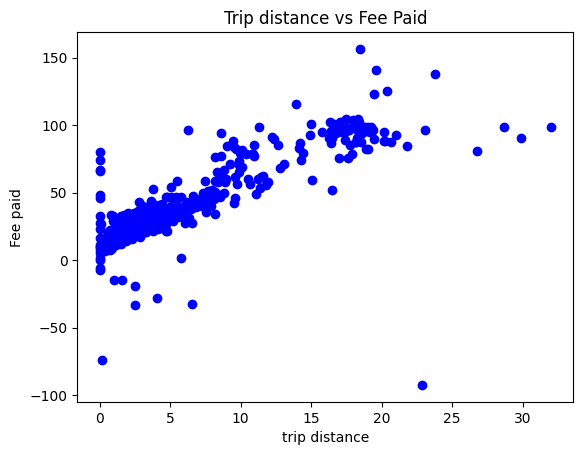

In [26]:
import matplotlib.pyplot as plt
print(X_train.columns, X_train.shape)
plt.scatter(X_train['trip_distance'][:1000],y_train[:1000],color='b')

plt.xlabel('trip distance')
plt.ylabel('Fee paid')
plt.title('Trip distance vs Fee Paid')

#### From the figure it is observable that there is a linear relationship between **trip distance** and **fee paid**.

### Ploting the total amount vs tip amount using scatter plot.

Index(['VendorID', 'congestion_surcharge', 'payment_type_4', 'RatecodeID_5.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'tolls_amount', 'tip_amount',
       'Airport_fee', 'day', 'secs', 'payment_type_0', 'hour',
       'payment_type_3', 'improvement_surcharge', 'passenger_count', 'time',
       'payment_type_1', 'trip_distance', 'payment_type_2', 'extra',
       'RatecodeID_1.0', 'RatecodeID_4.0'],
      dtype='object') (143500, 23)


Text(0.5, 1.0, 'Total Amount vs Tip Amount')

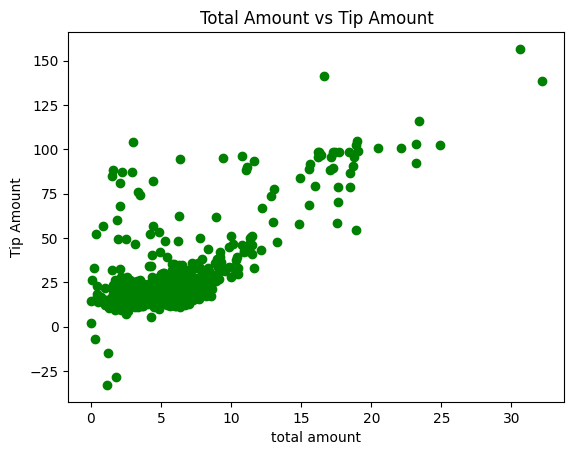

In [27]:
import matplotlib.pyplot as plt
print(X_train.columns, X_train.shape)
plt.scatter(X_train['tip_amount'][:500],y_train[:500],color='g')
plt.xlabel('total amount')
plt.ylabel('Tip Amount')
plt.title('Total Amount vs Tip Amount')

#### From the figure it is observable that as the tip amount increases the total amount also increase in most of the cases. Tip amount and total amount is positively co-related with each other.

Text(0.5, 1.0, 'Histogram of Passenger Counts')

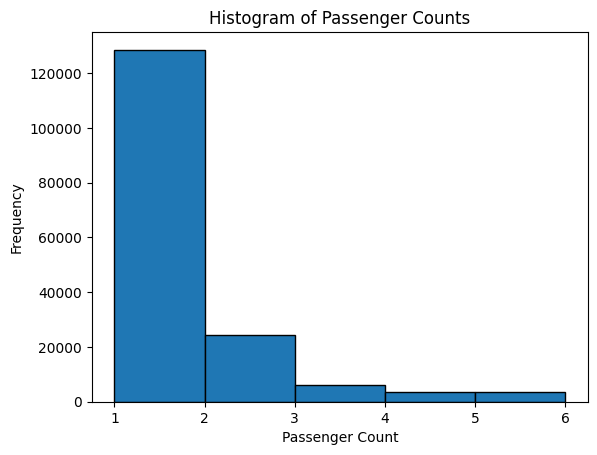

In [28]:
df['passenger_count'].plot(kind='hist', bins=range(1, 7), edgecolor='black')

# Adding labels and title
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Passenger Counts')

#### From the above histogram it is clear that the highest number of trips were from single or double passengers

In [29]:
X_train

,VendorID,congestion_surcharge,payment_type_4,RatecodeID_5.0,RatecodeID_2.0,RatecodeID_3.0,tolls_amount,tip_amount,Airport_fee,day,...,payment_type_3,improvement_surcharge,passenger_count,time,payment_type_1,trip_distance,payment_type_2,extra,RatecodeID_1.0,RatecodeID_4.0
128503,0,2.5,False,False,False,False,0.00,5.980499,0.00,29,...,False,1.0,1.0,2556.0,True,2.20,False,2.50,True,False
120372,1,0.0,False,False,False,True,20.00,23.429188,0.00,29,...,False,1.0,1.0,341.0,True,13.94,False,0.00,False,False
53840,1,2.5,False,False,False,False,0.00,2.690111,0.00,29,...,False,1.0,2.0,5920.0,True,0.74,False,0.00,True,False
1857,1,0.0,False,False,False,False,0.00,2.410091,0.00,29,...,False,1.0,1.0,1420.0,False,1.78,False,0.00,True,False
57351,0,2.5,False,False,False,False,6.55,14.906860,1.75,29,...,False,1.0,1.0,8602.0,True,9.50,False,9.25,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0.0,False,False,False,False,0.00,3.260969,0.00,30,...,False,1.0,1.0,1033.0,True,1.49,False,0.00,True,False
103694,0,2.5,False,False,False,False,0.00,3.382305,0.00,30,...,False,1.0,1.0,2810.0,True,1.60,False,2.50,True,False
131932,0,2.5,False,False,False,False,0.00,6.751209,0.00,29,...,False,1.0,1.0,1553.0,True,1.80,False,2.50,True,False
146867,1,2.5,False,False,False,False,0.00,1.815167,0.00,30,...,False,1.0,1.0,4011.0,False,0.60,False,2.50,True,False


In [30]:
X_test_encoded.shape

(50000, 23)

## **Model Fitting**


### Models Used:

1. Linear Regression
2. Ada Boost Regressor
3. MLP Regressor
4. Decision Tree Regressor
5. Random Forest Regressor
6. Gradient Boosting Regressor
7. XGBoost

 ## 1. **Linear Regression**


Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal is to find the best-fitting line that minimizes the sum of squared differences between the predicted and actual values. 

### Example

### Dataset
Consider a dataset with input feature \(X\) and target variable \(y\):

 X = [1, 2, 3, 4, 5] 
 y = [3, 5, 7, 9, 11] 

### Model
Linear regression models the relationship between \(X\) and \(y\) using the equation:

y = mx + b 

where:
- m is the slope (coefficient),
- b is the y-intercept.

### Training the Model
The model is trained to find the best-fit line that minimizes the sum of squared differences between the predicted and actual values.

### Mathematical Representation
The linear regression equation for the given data can be expressed as:

 y = 2x + 1 

Here, the model's parameters are:
- Slope (m)= 2.0
- Intercept (b) = 1.0

### Predictions

If X = [1,2] then y_pred using linear regression would be
[3,5] by using the equation y = 2x +1


In [31]:

# from sklearn.linear_model import LinearRegression

# li = LinearRegression()
# li.fit(X_train,y_train)
# li.score(X_val,y_val)

##  2. **Ada Boost Regressor**
Here make_regression() is used to create a synthetic dataset for regression, and AdaBoostRegressor is an ensemble regression model that combines multiple weak learners to create a robust predictive model. The code snippet demonstrates the generation of synthetic data, training an AdaBoostRegressor on the data, and evaluating its performance on a validation set.

### Mathematical Implementation

1. **Initialize Weights:**
   $$ w_i = \frac{1}{N}, \quad i=1, 2, \ldots, N $$
   where  N  is the number of data points.

2. **For  t = 1, 2, ..T  :**

   a. **Train Weak Learner:**
      $$ h_t(x) \text{ is trained using weights } w_i \text{ on the training data.} $$

   b. **Compute Error:**
      $$ \text{error}_t = \sum_{i=1}^{N} w_i \cdot \mathbb{1}(h_t(x_i) \neq y_i) $$
      where 1  is the indicator function.

   c. **Compute Weak Learner Weight:**
      $$ \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \text{error}_t}{\text{error}_t}\right) $$

   d. **Update Weights:**
      $$ w_i = w_i \cdot \exp\left(-\alpha_t \cdot \mathbb{1}(h_t(x_i) \neq y_i)\right) $$
      Normalize weights: $$ ( w_i = \frac{w_i}{\sum_{j=1}^{N} w_j} )$$ 

3. **Compute Final Prediction:**
   $$ F(x) = \sum_{t=1}^{T} \alpha_t \cdot h_t(x) $$

The final model F(x) is a weighted sum of weak learners' predictions, where weights $$ \alpha_t $$  are determined based on the error of each weak learner. The process is repeated for a predefined number of iterations T. This ensemble approach adapts over iterations, emphasizing instances that are challenging to predict.


In [32]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
# regr = AdaBoostRegressor(random_state=0, n_estimators=100)
# # here n_estimators denote the number of weak learners
# regr.fit(X_train, y_train)


# # Make predictions on the test data
# regr.score(X_val, y_val)


## 3. MLP Regressor

The code creates an MLPRegressor neural network, trains it on the provided training data, and then evaluates its performance on a validation set using the coefficient of determination. The MLPRegressor is a flexible neural network model capable of learning complex relationships in data for regression tasks. Adjusting parameters like max_iter can impact training duration and convergence behavior.



### Architecture
1. **Input Layer:**
   - Nodes represent the input features.

2. **Hidden Layers:**
   - Each layer contains nodes (neurons) that apply non-linear activation functions to input data.
   - The number of hidden layers and neurons can be adjusted based on the complexity of the task.

3. **Output Layer:**
   - Single node in regression tasks, providing the predicted continuous output.

### Training
1. **Forward Propagation:**
   - Input data is fed forward through the network, and weighted sums are calculated at each node.
   - Non-linear activation functions introduce non-linearity to the model.

2. **Loss Function:**
   - Measures the difference between predicted and actual values.
   - Common loss functions for regression include mean squared error (MSE) or mean absolute error (MAE).

3. **Backpropagation:**
   - The gradient of the loss function is computed with respect to the network's weights using the chain rule.
   - Weights are adjusted using optimization algorithms like gradient descent to minimize the loss.

4. **Training Iterations:**
   - The process of forward propagation, loss computation, and backpropagation is repeated iteratively to optimize the model.










In [33]:
# from sklearn.neural_network import MLPRegressor
# mlp_regr =  MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
# mlp_regr.fit(X_train, y_train)
# mlp_regr.score(X_val,y_val)



## 4. Decision Tree Regressor
The Decision Tree Regressor is a machine learning algorithm designed for regression tasks, predicting continuous target variables. It constructs a tree structure where each node represents a decision based on a feature, guiding the prediction process. The algorithm recursively splits the data at nodes to minimize impurity, commonly measured by mean squared error or mean absolute error. Decision trees are interpretable, allowing users to understand the decision-making logic. Techniques such as limiting tree depth and pruning are employed to prevent overfitting, ensuring better generalization to new data.

### Mathematical Implementation

### Tree Construction

1. **Splitting Criteria:**
   - At each node \(t\), select the feature \(j\) and threshold \(s\) that minimize the chosen impurity measure:

     $$ \text{impurity}(t) = \frac{1}{N_t} \sum_{i \in \text{samples at node } t} (y_i - \bar{y}_t)^2 $$

$$ \text{Where} N_t \text{is the number of samples at node} t, y_i \text{is the target value for sample i} ,\text{ and} \bar{y}_t \text{is the mean target value at node t} .$$


2. **Recursive Process:**
   - Recursively split the data into left $$ t_{\text{left}} $$ and right $$ t_{\text{right}} $$ nodes based on the selected feature j and threshold s
   - Continue this process until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).

3. **Leaf Nodes:**
   - Assign a constant value to each leaf node:

     $$ \hat{y}_t = \frac{1}{N_t} \sum_{i \in \text{samples at node } t} y_i $$

   $$ \text{where} \hat{y}_t \text{is the predicted value at node t} . $$

### Prediction

1. **Traversing the Tree:**
   - Given a new data point \(x\), traverse the tree from the root to a leaf node based on feature values.

2. **Leaf Prediction:**
   - The predicted value for the new data point is the constant value assigned to the leaf node reached during traversal.

This mathematical representation provides an overview of how a Decision Tree Regressor is trained and makes predictions. The splitting criteria aim to minimize the mean squared error at each node, and the leaf nodes store the mean target values of the samples in the respective nodes.


In [34]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
# from sklearn.pipeline import make_pipeline
# dt = DecisionTreeRegressor(max_depth = 10)

# # from sklearn.decomposition import PCA

# pipe = make_pipeline(StandardScaler(),dt )


# pipe.fit(X_train, y_train)

# pipe.score(X_val,y_val)

## 5. Random Forest Regressor

The Random Forest Regressor is an ensemble learning algorithm for regression tasks. It builds a multitude of decision trees on random subsets of the training data, and the predictions from individual trees are averaged to improve accuracy and mitigate overfitting. The algorithm introduces randomness by considering random subsets of features at each split, enhancing generalization.

### Key Features

1. **Ensemble of Decision Trees:**
   - RandomForestRegressor builds a specified number of decision trees during training.

2. **Random Subsampling:**
   - Each tree is trained on a random subset of the training data with replacement (bootstrap sampling).
   - Additionally, at each split, a random subset of features is considered.

3. **Averaging Predictions:**
   - The final prediction is obtained by averaging (for regression) or taking a majority vote (for classification) across all individual tree predictions.

### Benefits

1. **Improved Generalization:**
   - By combining predictions from multiple trees, RandomForestRegressor tends to have better generalization performance compared to individual decision trees.

2. **Reduced Overfitting:**
   - The random subsampling of both data and features helps reduce overfitting, making the model more robust.

### Hyperparameters

1. **Number of Trees (`n_estimators`):**
   - The number of decision trees in the forest.

2. **Maximum Depth of Trees (`max_depth`):**
   - The maximum depth of each decision tree. Controls the complexity of individual trees.

3. **Minimum Samples Split (`min_samples_split`):**
   - The minimum number of samples required to split an internal node.

4. **Minimum Samples Leaf (`min_samples_leaf`):**
   - The minimum number of samples required to be in a leaf node.



In [35]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42)


### Hyperparameter tuning
Grid Search CV is a hyperparameter tuning technique that systematically searches through a predefined grid of hyperparameter values for a machine learning model. It exhaustively evaluates model performance for each combination using cross-validation. The combination that yields the highest cross-validated performance is selected as the optimal set of hyperparameters.

In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
# param_grid = {'max_depth' : [None,2], 'n_estimators' : [50]}
# gs = GridSearchCV(rf, param_grid = param_grid, cv = 2)

In [38]:

# pipe_rf = make_pipeline(StandardScaler(),gs )

# pipe_rf.fit(X_train, y_train)

# pipe_rf.score(X_val,y_val)
# pipe_rf.fit(X_train, y_train)
# # gs.best_params_
# pipe_rf.score(X_val,y_val)

## 6. Gradient Boosting Regressor
The Gradient Boosting Regressor is an ensemble learning algorithm for regression tasks. It builds a series of weak learners (typically decision trees) sequentially, with each tree correcting the errors of the previous ones. The algorithm minimizes a loss function, adjusting the model's predictions during training. 



### Key Features

1. **Sequential Learning:**
   - Trees are built sequentially, and each subsequent tree focuses on correcting the errors of the combined ensemble so far.

2. **Gradient Descent:**
   - The algorithm uses gradient descent optimization to minimize the loss function, which measures the difference between predicted and actual values.

3. **Shrinkage (Learning Rate):**
   - A hyperparameter called the learning rate controls the contribution of each tree. Smaller learning rates often lead to better generalization.

### Boosting Process

1. **Initialize Model:**
   - Initialize the model with a constant value, often the mean of the target variable.

2. **Sequential Tree Building:**
   - For each iteration, build a decision tree to predict the residuals (the difference between actual and predicted values) of the current ensemble.

3. **Update Model:**
   - Update the model by adding a fraction of the predictions from the new tree to the current ensemble.

4. **Iterative Process:**
   - Repeat steps 2 and 3 for a predefined number of iterations or until a stopping criterion is met.

### Hyperparameters

1. **Number of Trees (`n_estimators`):**
   - The number of decision trees in the ensemble.

2. **Learning Rate (`learning_rate`):**
   - Controls the contribution of each tree to the ensemble.

3. **Maximum Depth of Trees (`max_depth`):**
   - The maximum depth of each decision tree.

4. **Minimum Samples Split (`min_samples_split`):**
   - The minimum number of samples required to split an internal node.



In [39]:
# from sklearn.ensemble import GradientBoostingRegressor

# gb = GradientBoostingRegressor( n_estimators=100, learning_rate=0.1, max_depth=15, random_state=0, loss='squared_error')


# gb.fit(X_train, y_train)

# gb.score(X_val,y_val)

## 7. XGBOOST

XGBoost, or Extreme Gradient Boosting, is an optimized and scalable implementation of gradient boosting. It enhances traditional gradient boosting by incorporating regularization techniques and parallel processing, resulting in faster training and improved model performance. XGBoost is effective for regression and classification tasks, often outperforming other algorithms.



### Key Features

1. **Gradient Boosting:**
   - XGBoost follows the principles of gradient boosting, building an ensemble of weak learners, typically decision trees, in a sequential manner.

2. **Regularization:**
   - XGBoost incorporates L1 (Lasso) and L2 (Ridge) regularization terms in the objective function to control the complexity of the model and prevent overfitting.

3. **Advanced Optimization:**
   - It employs a more advanced optimization algorithm, leveraging second-order partial derivatives to converge faster and make the training process more efficient.

4. **Tree Pruning:**
   - XGBoost uses a technique called tree pruning to remove branches that add little predictive power, improving both efficiency and generalization.

### Mathematical Explanation

#### Objective Function:
The objective function in XGBoost is a sum of a loss function and regularization terms:

$$ \text{Obj}(\theta) = \sum_{i=1}^{n} \mathcal{L}(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) $$
$$ \text{where:} $$
$$ \quad - \mathcal{L}(y_i, \hat{y}_i) \text{ is the loss function measuring the difference between the true target } y_i \text{ and the predicted target } (\hat{y}_i), $$
$$ \quad - \Omega(f_k) \text{ is the regularization term for each tree } f_k. $$


#### Update Rule:
The update rule for adding a new tree is given by:

$$  \hat{y}_i^{(t+1)} = \hat{y}_i^{(t)} + \gamma \cdot f_t(x_i) $$

where:
$$ \hat{y}_i^{(t)} \text{ is the predicted target at iteration } t, $$
$$ \gamma \text{ is the learning rate, and } $$
$$ f_t(x_i) \text{ is the output of the newly added tree at iteration } t. $$


#### Regularization Term:
The regularization term encourages sparsity in the leaf scores:

$$ \Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2  $$

where:
- T is the number of leaves,
 $$ w_j \text{ is the score assigned to the } j\text{-th leaf} $$ 
 $$ \gamma \text{ and } \lambda \text{ are regularization parameters.} $$




In [40]:

from xgboost import XGBRegressor

model = XGBRegressor( n_jobs = -1, n_estimators = 120, random_state = 42, eta = 0.09, max_depth = 7)

model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9656630350233886

#### Learning Rate (η):
The learning rate is a hyperparameter denoted as η and controls the step size at each iteration. It is a small positive value (e.g., 0.09) that scales the contribution of each tree to the overall model.

#### Maximum Depth 
It is a hyperparameter that limits the depth of each decision tree in the ensemble. A higher value allows the model to capture more complex patterns but increases the risk of overfitting.

### Models and their Accuracies in Validation data
| Model                   | R2 Scores in Validation data |
|-------------------------|----------|
| Linear Regression       | 0.769658   |
| Ada Boost Regressor     | 0.6933309  |
| MLP regressor           |0.5678926   |
| Decision Tree Regressor | 0.94404    |
| Random Forest regressor | 0.952395   |
| Gradient boosting Regressor| 0.9486    |
| XGBoost Regressor       | 0.95875 |

#### On testing the above models (Linear Regression, MLP Regressor, Ada Boost Regressor, Random Forest Regressor, Decision Tree Regressor, Gradient Boosting Regressor), XGBoost gave the highest accuracy in the validation data and hence it was used for the final submission.


### R2 Score
$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \bar{y})^2}{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} $



In [41]:
# predictions0 = li.predict(X_test_encoded)
# predictions1 = dt.predict(X_test_encoded)
predictions = model.predict(X_test_encoded)
predictions

array([33.555992, 24.74195 , 16.205145, ..., 21.21797 , 33.903503,
       17.216793], dtype=float32)

In [42]:
submission = pd.DataFrame(columns = ['ID', 'total_amount'])
submission['ID'] = [i + 1 for i in range(len(predictions))]
submission['total_amount'] = predictions
submission.to_csv('submission.csv', index = False)